In [1]:
import pandas as pd
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Fetching data
start = dt.datetime(2021, 7, 1)
end = dt.datetime(2022, 1, 27)
symbol = 'AXISBANK.NS'
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
# Selecting specific columns
stk_data = stk_data[["Open", "High", "Low", "Close"]]

In [4]:
stk_data

,Open,High,Low,Close
Date,,,,
2021-07-01,750.000000,754.400024,744.500000,746.450012
2021-07-02,747.599976,752.849976,744.000000,750.650024
2021-07-05,757.099976,762.000000,753.400024,760.349976
2021-07-06,757.000000,767.000000,755.200012,758.349976
2021-07-07,755.900024,764.000000,752.250000,762.900024
...,...,...,...,...
2022-01-19,725.200012,731.950012,718.700012,729.599976
2022-01-20,731.049988,737.150024,722.150024,728.900024
2022-01-21,722.000000,725.250000,708.049988,712.500000


In [5]:
stk_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143 entries, 2021-07-01 to 2022-01-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    143 non-null    float64
 1   High    143 non-null    float64
 2   Low     143 non-null    float64
 3   Close   143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [6]:
# Scaling data
column = "Close"
MS = MinMaxScaler()
data1 = MS.fit_transform(stk_data[[column]])

In [7]:
# Splitting the data into train and test sets
training_size = round(len(data1) * 0.80)
X_train = data1[:training_size]
X_test = data1[training_size:]
y_train = data1[:training_size]
y_test = data1[training_size:]

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
# Define trends and lags
#trends = ['n', 't', 'c', 'ct']
orders = [(0,0,0),(0,0,1),(2,0,1),(1,1,1)]

In [10]:
# Function to calculate RMSE and MAPE
def rmsemape(actual, predicted):
    mse = mean_squared_error(actual, predicted, squared=False)
    print(f"RMSE: {mse}")
    mape = np.mean(np.abs((actual - predicted) / actual)) * 100
    print(f"MAPE: {mape}%")
    return mse, mape

In [11]:
# Training and evaluating models
import numpy as np
for i in orders:
#for td in trends:
    model = SARIMAX(X_train,order=i,seasonal_order=(0,0,0,12))
    model_fit = model.fit()
    y_pred = model_fit.predict(len(X_train), len(data1) - 1)
    #print(f"Trend={td}")
    rmsemape(y_test, y_pred)
    print("****")

RMSE: 0.318401583689947
MAPE: 100.0%
****
RMSE: 0.31349631914945314
MAPE: 99.07981088515065%
****
RMSE: 0.1645900022417401
MAPE: 74.84847253802036%
****
RMSE: 0.1499468920795021
MAPE: 85.7818081981558%
****


In [12]:
# Forecasting
i = (2,0,1)
#td = 'ct'
model = SARIMAX(X_train,order=i,seasonal_order=(0,0,0,12))
model_fit = model.fit()
y_pred = model_fit.predict(len(X_train), len(data1) - 1)

In [13]:
y_pred

array([0.31504557, 0.31185401, 0.30860294, 0.30538091, 0.30219227,
       0.29903691, 0.29591449, 0.29282468, 0.28976713, 0.28674151,
       0.28374748, 0.28078471, 0.27785287, 0.27495165, 0.27208073,
       0.26923978, 0.26642849, 0.26364656, 0.26089367, 0.25816953,
       0.25547384, 0.25280629, 0.2501666 , 0.24755446, 0.24496961,
       0.24241174, 0.23988058, 0.23737585, 0.23489727])

In [14]:
# Inverse transform the scaled data
aTestNormTable = pd.DataFrame(y_test, columns=[column])
actual_stock_price_test_ori = MS.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA = pd.DataFrame(actual_stock_price_test_ori, columns=[column])

In [15]:
actual_stock_price_test_oriA

,Close
0,709.650024
1,688.900024
2,674.349976
3,665.849976
4,669.349976
5,678.799988
6,667.500000
7,672.150024
8,675.450012
9,670.500000


In [16]:
pTestNormTable = pd.DataFrame(y_pred, columns=[column])
predicted_stock_price_test_ori = MS.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP = pd.DataFrame(predicted_stock_price_test_ori, columns=[column])

In [17]:
predicted_stock_price_test_oriP

,Close
0,712.218817
1,711.599653
2,710.968945
3,710.343872
4,709.725276
5,709.113136
6,708.507387
7,707.907964
8,707.314799
9,706.727828


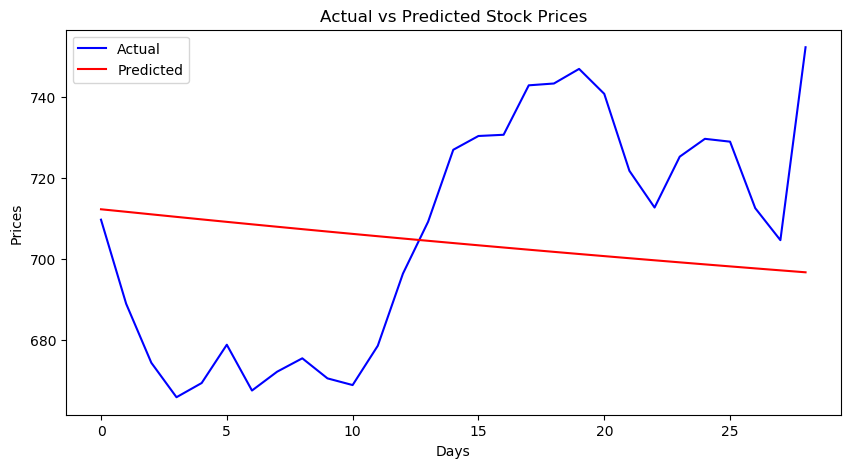

In [18]:
# Plotting actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(actual_stock_price_test_oriA.values, color='blue', label="Actual")
plt.plot(predicted_stock_price_test_oriP.values, color='red', label="Predicted")
plt.legend()
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Days")
plt.ylabel("Prices")
plt.show()

In [19]:
# Forecasting future prices
forecast = model_fit.predict(len(data1), len(data1) + 3)
fTestNormTable = pd.DataFrame(forecast, columns=["Closefore"])
forecast_stock_price_test_ori = MS.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF = pd.DataFrame(forecast_stock_price_test_ori, columns=["Closefore"])

In [20]:
forecast

array([0.23244458, 0.23001749, 0.22761575, 0.22523908])

In [21]:
fTestNormTable

,Closefore
0,0.232445
1,0.230017
2,0.227616
3,0.225239


In [22]:
forecast_stock_price_test_ori

array([[696.19422356],
       [695.72336879],
       [695.25743049],
       [694.79635731]])

In [23]:
forecast_stock_price_test_oriF

,Closefore
0,696.194224
1,695.723369
2,695.257430
3,694.796357


In [24]:
# Save forecasted prices to CSV
forecast_stock_price_test_oriF.to_csv("CloseSARIMAX.csv", index=False)

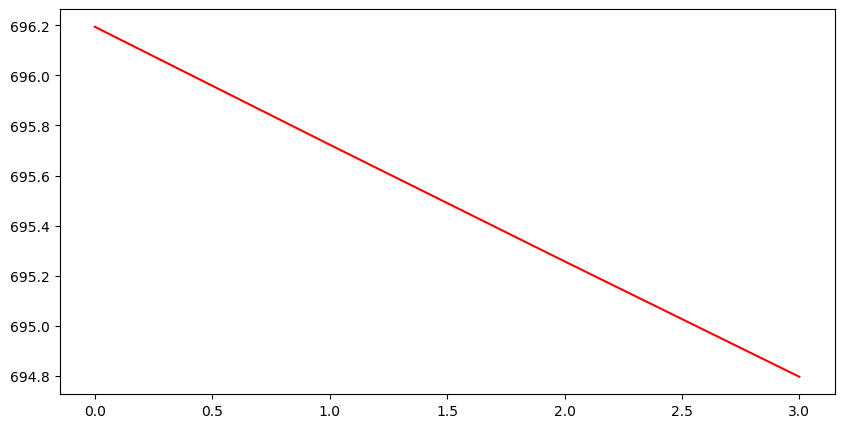

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(actual_stock_price_test_oriA[116:145], color = 'blue', label="Actual")
plt.plot(forecast_stock_price_test_oriF, color = 'red', label ="Predicted")